# Функции. Словари. Файлы. Модули

## Функции

In [2]:
def min2(a, b):
    if a < b:
        return a
    return b

min2(1, 3)

1

In [3]:
def f(n):
    return n * 10 + 5

f(f(f(10)))

10555

Про звезды - https://tirinox.ru/stars-in-python/

Значения параметров по умолчанию

In [4]:
def f2(n=5, g=3):
    return n * g
f2()

15

In [5]:
def append_zero(xs):
    xs.append(0)
    xs = [100]
    
a = []
append_zero(a)
print(a) # [0]

[0]


Напишите функцию modify_list(l), которая принимает на вход список целых чисел, удаляет из него все нечётные значения, а чётные нацело делит на два. Функция не должна ничего возвращать, требуется только изменение переданного списка, например:

In [16]:
def modify_list(l):
    k = 0
    for i in range(len(l)):
        if l[i - k] % 2 == 1:
            l.remove(l[i - k])
            k += 1
        else:
            l[i - k] = l[i - k] // 2

In [17]:
lst = [1, 2, 3, 4, 5, 6]
print(modify_list(lst))  # None
print(lst)               # [1, 2, 3]
modify_list(lst)
print(lst)   

None
[1, 2, 3]
[1]


## Множества

In [19]:
s = set() # создание пустого множества
basket = {'apple', 'banana', 'apple'}
print('apple' in basket)

True


In [25]:
s.add(1)
s.add('1')
s.remove('1')
s.discard('1') # не кинет ошибку, если элемента нет
len(s)

1

In [26]:
for x in basket:
    print(x)

banana
apple


## Словари

Ключи - неизменяемы (числа, строки)

Значениями могут быть списки

In [32]:
d = dict()
d['1'] = 'a'
print('1' in d)
print(d.get('1')) # не кинет ошибку, если элемента нет, None
d['2'] = 'b'
del d['2']
print(d)

True
a
{'1': 'a'}


In [38]:
for key in d:
    print(key, end=' ')
    
print()

for value in d.values():
    print(value, end=' ')
    
print()

for k, v in d.items():
    print(k, v)

1 
a 
1 a


In [39]:
def update_dictionary(d, key, value):
    if d.get(key) != None:
        d[key].append(value)
    elif d.get(2 * key) != None:
        d[2 * key].append(value)
    else:
        d[2 * key] = [value]

In [40]:
d = {}
print(update_dictionary(d, 1, -1))  # None
print(d)                            # {2: [-1]}
update_dictionary(d, 2, -2)
print(d)                            # {2: [-1, -2]}
update_dictionary(d, 1, -3)
print(d)                            # {2: [-1, -2, -3]}

None
{2: [-1]}
{2: [-1, -2]}
{2: [-1, -2, -3]}


In [43]:
s = [i.lower() for i in input().split()]

def word_count(s):
    d = dict()
    for _s in s:
        if d.get(_s) != None:
            d[_s] += 1
        else:
            d[_s] = 1
    for k, v in d.items():
        print(k, v)
        
word_count(s)

a aa abC aa ac abc bcd a
a 2
aa 2
abc 2
ac 1
bcd 1


## Чтение из файла

In [3]:
inf = open('file.txt', 'r')
s1 = inf.readline()
inf.close()
print(s1, end='')

1 2 3


In [4]:
with open('file.txt') as inf: # сама закроет файл
    s1 = inf.readline()
    
print(s1, end='')

1 2 3



In [5]:
# strip() - убрать все служебные символы с краев
with open('file.txt') as inf: # сама закроет файл
    s1 = inf.readline().strip()
    
print(s1, end='')

1 2 3

In [6]:
with open('file.txt') as inf: # сама закроет файл
    for line in inf:
        line = line.strip()
        print(line)

1 2 3
4 5 6


In [7]:
ouf = open('output.txt', 'w')
ouf.write('ololo\n')
ouf.close()

In [8]:
with open('output.txt', 'w') as ouf:
    ouf.write('some text\n')
    

## Задачи

### Задача 1
Декодировать строку при чтении из файла.

In [20]:
with open('dataset_3363_2.txt') as inf, open('file_out', 'w') as ouf:
    l = ''
    for line in inf:
        line = line.strip()
        cur_s = ''
        cur_num = ''
        for s in line:
            if s.isdigit():
                cur_num += s
            else:
                
                if cur_num != '':
                    l += cur_s * int(cur_num)
                    cur_num = ''
                cur_s = s
        l += cur_s * int(cur_num)
    ouf.write(l)  

### Задача 2
Напишите программу, которая считывает текст из файла (в файле может быть больше одной строки) и выводит самое частое слово в этом тексте и через пробел то, сколько раз оно встретилось. Если таких слов несколько, вывести лексикографически первое (можно использовать оператор < для строк).

In [7]:
# с учетом первого слова и сохранением его как ведущего
with open('dataset_3363_3.txt') as inf:
    d = dict()
    
    for line in inf:
        line = line.strip()
        words_in_line = line.split()
        
        for w in words_in_line:
            if d.get(w.lower()) == None:
                d[w.lower()] = []
                d[w.lower()].append(w)
                d[w.lower()].append(1)
            else:
                d[w.lower()][1] += 1
    
    v = d.values()
    
    n = 0
    
    for s in v:
        if s[1] > n:
            n = s[1]
    
    l = []
    for s in v:
        if s[1] == n:
            print(s)
            l.append(s[0])
            
    sorted(l)
    print(l)

['apbTpUZUT', 10]
['apbTpUZUT']


In [9]:
with open('dataset_3363_3.txt') as f: 
    s = f.read().strip().lower().split()
    z = {i: s.count(i) for i in s}
    a, b = 0, ''
    for x in z.keys():
        y = z[x]
        if y > a:
            a = y
            b = x
        elif a == y and x < b:
            b = x
    fin = str(b) + ' ' + str(a)
    print(fin)

apbtpuzut 10


### Задача 3

Имеется файл с данными по успеваемости абитуриентов. Он представляет из себя набор строк, где в каждой строке записана следующая информация:

Фамилия;Оценка_по_математике;Оценка_по_физике;Оценка_по_русскому_языку

Поля внутри строки разделены точкой с запятой, оценки — целые числа.

Напишите программу, которая считывает файл с подобной структурой и для каждого абитуриента выводит его среднюю оценку по этим трём предметам на отдельной строке, соответствующей этому абитуриенту.

Также в конце файла, на отдельной строке, через пробел запишите средние баллы по математике, физике и русскому языку по всем абитуриентам.

In [31]:
with open('dataset_3363_4.txt') as inf, open('file_out_3', 'w') as ouf:
    marks = [0, 0, 0]
    count = 0
    for line in inf:
        marks_in_line = [int(i) for i in line.strip().split(';')[1:]]
        marks = [marks[i] + marks_in_line[i] for i in range(3)]
        average = sum(marks_in_line) / 3
        ouf.write(str(average) + '\n')
        count += 1
    
    marks = [str(i / count) + ' ' for i in marks]
    ouf.write(marks[0] + marks[1] + marks[2])

## Модули

https://docs.python.org/3/library/

In [1]:
import sys
print(len(sys.argv))

3


Модуль supprocess - запуск внешних процессов

In [4]:
import math
R = float(input())
print(2 * R * math.pi)

3
18.84955592153876


In [7]:
print(*sys.argv[1:]) #печатает значения всех переданных аргументов на экран (имя скрипта выводить не нужно). 

-f /Users/nikolajkarasov/Library/Jupyter/runtime/kernel-785c22eb-e936-4f44-97bf-2faab11b26c8.json


In [17]:
# вывод количества строк
import requests
r = requests.get('https://stepic.org/media/attachments/course67/3.6.2/747.txt')
#print(r.text)
len(r.text.splitlines())


41

Имеется набор файлов, каждый из которых, кроме последнего, содержит имя следующего файла.
Первое слово в тексте последнего файла: "We".
    
Найти содержимое последнего файла.

In [ ]:
name = '699991.txt'
while True:
    r = requests.get('https://stepic.org/media/attachments/course67/3.6.3/' + name)
    name = r.text
    if name.splitlines()[0].split()[0] == 'We':
        print(r.text)
        break

## Задачи

### Задача 1

Напишите программу, которая принимает на стандартный вход список игр футбольных команд с результатом матча и выводит на стандартный вывод сводную таблицу результатов всех матчей.

За победу команде начисляется 3 очка, за поражение — 0, за ничью — 1.

Формат ввода следующий:
В первой строке указано целое число n — количество завершенных игр.
После этого идет n строк, в которых записаны результаты игры в следующем формате:
Первая_команда;Забито_первой_командой;Вторая_команда;Забито_второй_командой

Вывод программы необходимо оформить следующим образом:
Команда:Всего_игр Побед Ничьих Поражений Всего_очков

In [8]:
n = int(input())
d = dict()

for i in range(n):
    l = input().split(';')
    if d.get(l[0]) == None:
        d[l[0]] = [0, 0, 0, 0, 0]
    if d.get(l[2]) == None:
        d[l[2]] = [0, 0, 0, 0, 0]
        
    if int(l[1]) < int(l[3]): 
        d[l[0]][3] += 1
        d[l[2]][4] += 3
        d[l[2]][1] += 1
    elif int(l[1]) == int(l[3]):
        d[l[0]][2] += 1
        d[l[2]][2] += 1
        d[l[0]][4] += 1
        d[l[2]][4] += 1
    else:
        d[l[0]][1] += 1
        d[l[0]][4] += 3
        d[l[2]][3] += 1
    
    d[l[0]][0] += 1
    d[l[2]][0] += 1
    
for k, v in d.items():
    print(k, end=':')
    print(*v)

3
ЦСКА;0;Зенит;2
Зенит;3;Спартак;1
Спартак;1;ЦСКА;1
ЦСКА:2 0 1 1 1
Зенит:2 2 0 0 6
Спартак:2 0 1 1 1


### Задача 2

Напишите программу, которая умеет шифровать и расшифровывать шифр подстановки. Программа принимает на вход две строки одинаковой длины, на первой строке записаны символы исходного алфавита, на второй строке — символы конечного алфавита, после чего идёт строка, которую нужно зашифровать переданным ключом, и ещё одна строка, которую нужно расшифровать.

In [3]:
# решение на словарях
alphabet = [i for i in input()]
code = [j for j in input()]

encodepairs_1 = {alphabet[i]: code[i] for i in range(len(code))}
encodepairs_2 = {code[i]: alphabet[i] for i in range(len(code))}

code_str = input()
code_str_res = ''
for s in code_str:
    code_str_res += encodepairs_1.get(s)
print(code_str_res)

decode_str = input()
decode_str_res = ''
for s in decode_str:
    decode_str_res += encodepairs_2.get(s)
print(decode_str_res)

abcd
*d%#
abacabadaba
*d*%*d*#*d*


In [ ]:
# Считываем 4 строки в цикле
original, coding, first_string, second_string = (input() for i in range(4))

# По индексу символа из оригинала берём символ на замену из кодировки,
# для каждого символа из строки, которую нужно закодировать
print(*[coding[original.find(symbol)] for symbol in first_string], sep='')
# Аналогично, только наоборот
print(*[original[coding.find(symbol)] for symbol in second_string], sep='')

### Задача 3

На вход программе первой строкой передаётся количество d известных нам слов, после чего на d строках указываются эти слова. Затем передаётся количество l строк текста для проверки, после чего l строк текста.

Выведите уникальные "ошибки" в произвольном порядке. Работу производите без учёта регистра.

In [16]:
d = set()
for i in range(int(input())):
    [d.add(s.lower()) for s in input().split()]

new_set = set()
for i in range(int(input())):
       [new_set.add(s) for s in input().split() if s.lower() not in d and s.lower() not in new_set]
        
print(*new_set, sep='\n')

2
a s
d c
2
d c
g h
g
h


### Задача 4

In [20]:
commands = {'восток':[0, 1], 'запад':[0,-1], 'север':[1,1], 'юг':[1,-1]}
pos = [0, 0]
for i in range(int(input())):
    line = input().split()
    pos[commands.get(line[0])[0]] += commands.get(line[0])[1] * int(line[1])
print(*pos)

1
север 10 
0 10


### Задача 5

Дан файл с таблицей в формате TSV с информацией о росте школьников разных классов.

Напишите программу, которая прочитает этот файл и подсчитает для каждого класса средний рост учащегося.

Файл состоит из набора строк, каждая из которых представляет собой три поля:
Класс Фамилия Рост

Класс обозначается только числом. Буквенные модификаторы не используются. Номер класса может быть от 1 до 11 включительно. В фамилии нет пробелов, а в качестве роста используется натуральное число, но при подсчёте среднего требуется вычислить значение в виде вещественного числа.

Выводить информацию о среднем росте следует в порядке возрастания номера класса (для классов с первого по одиннадцатый). Если про какой-то класс нет информации, необходимо вывести напротив него прочерк, например:

In [25]:
d = {i:[0, 0] for i in range(1, 12)}
with open('dataset_3380_5.txt') as inf:
    for line in inf:
        line = line.strip().split('\t')
        d[int(line[0])][0] += int(line[2])
        d[int(line[0])][1] += 1

for k in sorted(d):
    if d[k][1] == 0:
        print(k, '-')
    else:
        print(k, d[k][0] / d[k][1])

1 125.0
2 130.0
3 133.6153846153846
4 139.2941176470588
5 144.75
6 155.45454545454547
7 160.0
8 166.1
9 172.0
10 169.16666666666666
11 173.5


## NumPy

In [3]:
from numpy import *
a = array([2,3,4])
print(a)
a

[2 3 4]


array([2, 3, 4])

In [4]:
a.ndim # размерность массива (одномерный, двумерный)

1

In [5]:
a.shape # размеры массива (число строк, столбцов)

(3,)

In [7]:
b = array([(1, 2), (3, 4)])
print(b)

[[1 2]
 [3 4]]


In [8]:
z = zeros((3, 2))
z

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [10]:
arange(10, 30, 5)

array([10, 15, 20, 25])

In [11]:
linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [12]:
sin(b)

array([[ 0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 ]])

In [13]:
b + b

array([[2, 4],
       [6, 8]])

In [14]:
b ** 2

array([[ 1,  4],
       [ 9, 16]])

In [15]:
b < 4

array([[ True,  True],
       [ True, False]])

## Matplotlib

Text(0.5, 1.0, 'title')

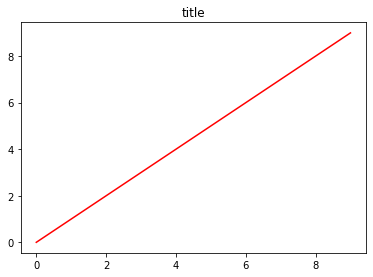

In [19]:
from pylab import *
x, y = arange(10), arange(10)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y, 'r')
axes.set_title('title')

In [22]:
%matplotlib inline

Text(0.5, 1.0, 'title 2')

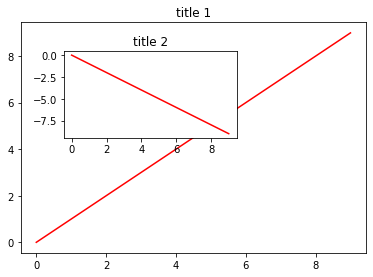

In [23]:
x, y = arange(10), arange(10)
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
axes1.plot(x, y, 'r')
axes1.set_title('title 1')
axes2.plot(x, -y, 'r')
axes2.set_title('title 2')

(-5.12441682205355, 4.636721049912267)

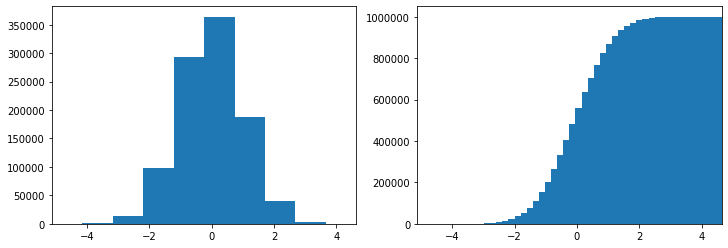

In [27]:
from numpy import *
n = random.randn(1000000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_xlim(min(n), max(n))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_xlim(min(n), max(n))